<a href="https://colab.research.google.com/github/AlejandroSenabre/Proyecto-Data-Science-CoderHouse/blob/main/cuarta_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de la asignación de préstamos: analisis de la morosidad en el sector bancario

## **Índice**   
1. [*Introducción*](#id1)
2. [*Preview y carga del DataSet*](#id2)
3. [*Lectura y transformación de los datos*](#id3)  
  3.1 [*Analisis de las variables*](#id4)  
  3.2 [*Limpieza y transformación de los datos*](#id5)
4. Gráficos
5. Regresión logistica
6. Arbolitos
7. Conclusión

## 1. Introducción <a name="id1"></a>
Una de las funciones más importantes en un banco es su labor como prestamista de dinero, necesario para el crecimiento económico de un país al permitir a los usuarios hacerse de un monto de dinero en el apto que de otra forma le hubiera sido difícil o imposible de obtener, y esto es fundamental para mover la economía al ser habitualmente usado como método de financiación de diversos proyectos

Para un banco, hacer rentable el sistema de préstamos es fundamental para mantener su solvencia y continuar brindando servicios financieros a sus clientes. Esto implica que la banca debe financiarse con los intereses que cobra a sus clientes y tener un flujo de efectivo suficiente para poder seguir otorgando nuevos créditos y afrontar las pérdidas por morosidad. Este último es un factor clave que va a determinar la rentabilidad de un banco ya que es el mayor riesgo asociado con la concesión de préstamos. La morosidad puede ocurrir por múltiples causas, ya sea por no poseer los suficientes ingresos para afrontar el importe de las cuotas, tasas de intereses elevadas, monto total de la deuda excesivamente altos o por la simple falta de disposición para cumplir con los pagos.

En este proyecto, con la base de datos que tenemos disponible de diferentes características de los préstamos dados, se tratará de buscar qué variables puede llevar al prestatario a tener dificultades con la puntualidad de sus pagos e intentar dar una predicción certera a cada uno de los prestamos de convertirse en moroso.

Esta investigación puede ser una herramienta valiosa para ayudar a la banca a tomar decisiones informadas sobre las posibles perdidas ocacionada por la falta de pagos de sus clientes y poder actuar ante ello.

**Contexto comercial:** 
  
  

**Objetivo:** Encontrar una probabilidad de que un prestamo tenga dificultades en el pago de las cuotas.

## 2. Preview y carga del DataSet <a name="id2"></a>


El dataset fue obtenido a través de la página web de [*Kaggle*](https://www.kaggle.com/datasets/hemanthsai7/loandefault?select=train.csv), aparentemente fue creado para un Hackathon, estos son eventos para retar a programadores a sacar lo mejor de si, ofrecido por [*MachineHack*](https://machinehack.com/) que es una plataforma en línea para competencias expecializado en DataScience y Machine Learning.  

El origen de los datos no está especificado, por lo que no se sabe si es un dataset de un banco real o datos artificiales creados para este modelo, pero de todas formas nos van a resultar utiles para el analisis. 
 
Lo interesante de estos datos es que nos proporciona una columna llamada "*Loan Status*", la cual nos indica si el identificador correspondiente se encuentra al día con sus pagos. Esta columna toma como valor "0" para aquellos que no presentan morosidad, y un valor "1" que los define como deudores. Con esto se puede tener una mejor comprensión de cuales son las variables que tienen en común los deudores para separarlo de no deudores.
- **<font color='blue'>Archivo:</font>** loan.csv
- **<font color='blue'>Columnas:</font>** 35
- **<font color='blue'>Filas totales</font>** 67.463  

### 2.1 Carga de librerias y el Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


url_loa='https://raw.githubusercontent.com/AlejandroSenabre/Data-Coder/main/loans.csv'


loan=pd.read_csv(url_loa)

In [ ]:
loan2=loan

## 3. Lectura y transformación de los datos <a name="id3"></a>
Resumen de las celdas:
- Analizar las columnas categoricas y sus variables.
- Eliminación de columnas innecesarias para el analisis.
- Se transformaron las variables categoricas a numericas mediante diferentes metodos.


Lo primero que se hará es transformar las variables categoricas a variables numericas para poder manejarlas correctamente.

### 3.1 Analisis de las variables <a name="id4"></a>

#### 3.1.1 Resumen del dataset

Se mostrarán la información que contiene cada una de las columnas. Podemos observar que tenemos 35 columnas y que hay 9 que poseen información no numerica.  
Las principales columnas que observamos son:
- **<font color='green'>Loan Amount:</font>** Nos muestra el monton del prestamo.
- **<font color='green'>Term:</font>** La duración del prestamo. 
- **<font color='green'>Grade & Sub Grade: </font>** Riesgo que tiene el prestatario para el banco. "Grade" va de A hasta G, donde el ultimo grado es el que el banco considera menos confiable.
- **<font color='green'>Interest Rate: </font>** Tasa de interes del prestamo.
- **<font color='green'>Loan Status:</font>** Es la base de este trabajo, nos proporciona la información sobre si el prestamo se encuentra en mora (1) o está al dia con los pagos (0).

In [ ]:
pd.options.display.max_columns = None
loan.head(3)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

#### 3.1.2 Lectura de las variables categoricas



In [ ]:
print(loan2.groupby('Employment Duration').agg({'Employment Duration' : 'count'}), '\n')
print('---------------- Payment plan ----------------')
print(loan2['Payment Plan'].value_counts(), '\n')
print('---------------- Loan Title ----------------')
print(loan2['Loan Title'].value_counts(), '\n')
print('---------------- Application Type ----------------')
print(loan2['Application Type'].value_counts(), '\n')
print('---------------- Verification Status ----------------')
print(loan2['Verification Status'].value_counts(), '\n')
print('---------------- Initial List Status ----------------')
print(loan2['Initial List Status'].value_counts(), '\n')

                     Employment Duration
Employment Duration                     
MORTGAGE                           36351
OWN                                 6962
RENT                               24150 

---------------- Payment plan ----------------
n    67463
Name: Payment Plan, dtype: int64 

---------------- Loan Title ----------------
Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64 

---------------- Application Type ----------------
INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64 

---------------- Verification Status ----------------
Source Verified    33036
Verified           18078
Not Verified

### 3.2 Limpieza y transformación de los datos <a name="id5"></a>

En esta sección se transformaran las variables categoricas a variables numericas para poder manejar mejor el dataset a raiz de las futuras predicciones. Ademas se eliminaran las columnas que no nos den mucha información o que puedan perjudicar en el analisis.

#### 3.2.1 Reducción de datos 
**Las columnas eliminadas son las siguientes:**  
- <font color='lightblue'>**ID:**</font> Es un codigo de verificación para cada prestamo. No sirve a la hora de hacer predicciones.
- <font color='lightblue'>**Loan Title:**</font> El motivo expresado del prestamo. Son demasiadas variables, en especifico 109 variables distintas, que se complica a la hora de agruparlas en menos categorias.
- <font color='lightblue'>**Initial List Status:**</font> Es el estado de lista inicial. Se divide en "Esperando" y "Reenviado". No tiene repercusión en el analisis.
- <font color='lightblue'>**Batch Enrolled:**</font> Numero de inscripcion del lote. Mismo motivo que la eliminación de "ID".
- <font color='lightblue'>**Verification Status:**</font> No tiene repercusión en el analisis.
- <font color='lightblue'>**Payment Plan:**</font> No tiene repercusión en el analisis.

In [ ]:
loan2.drop(columns = ['ID', 'Loan Title', 'Initial List Status', 'Batch Enrolled','Verification Status', 'Payment Plan'], inplace = True)

#### 3.2.2 Aplicando OneHotEncoder

Se aplicará a las columnas "Employment Duration" y "Application Type", la primera al tener 3 variables distintas, lo que se hizo fue crear 3 columnas distintas para cada una de las variables y rellenar con "1" y "0" dependiende de cual de esa 3 caracteristica tiene el prestamo. Mientras que con la ultima columna solo hacia referencia a si el prestamo era individual o en conjunto, por lo que se decidio reemplazar por "1" los individuales, y dejar los que no con "0".

In [ ]:
ohe = OneHotEncoder()
ohe.fit(loan2[['Employment Duration']])
ohe_result = ohe.transform(loan2[['Employment Duration']]).toarray()
ohe_df = pd.DataFrame(ohe_result, columns=ohe.get_feature_names_out(['Employment Duration']))

# Concatenamos el dataframe original con el dataframe de variables binarias
loan2 = pd.concat([loan2, ohe_df], axis=1)
# Eliminamos la columna original
loan2 = loan2.drop('Employment Duration', axis=1)

In [ ]:
## Transformamos los resultados "float" a "int" para quitar los decimales. Queda mas lindo :)
loan2['Employment Duration_MORTGAGE']=loan2['Employment Duration_MORTGAGE'].astype(int)
loan2['Employment Duration_OWN']=loan2['Employment Duration_OWN'].astype(int)
loan2['Employment Duration_RENT']=loan2['Employment Duration_RENT'].astype(int)


In [ ]:
loan2['Application Type'] = loan2['Application Type'].replace({'INDIVIDUAL': 1, 'JOINT':0})

#### Aplicamos LabelEncoder para transformar "Grade" y "Sub Grade"

Transformamos manualmente los valores de "Grade"

In [ ]:
loan2['Grade'] = loan2['Grade'].replace({'A': 1, 'B': 2, 'C':3 , 'D':4 , 'E':5, 'F':6 , 'G':7})

Transformamos Sub Grade con ScikitLearn 

In [ ]:
loan2 = loan2.sort_values('Sub Grade')   ## Ordenamos los datos por "Sub Grade"
loan2['Sub Grade'] = LabelEncoder().fit_transform(loan2['Sub Grade']) + 1   #Sumo 1 para que no arranque con 0.
loan2 = loan2.sort_index()                            # Volvemos a ordenarlo por el indice
# loan2.head()   #Vemos si funcionó correctamente

---

### 3.3 Resultado de la transformación <a name="id6"></a>


In [ ]:
pd.options.display.max_columns = None #Para ver todas las columnas completas sin limites
loan.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,C4,MORTGAGE,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,D3,RENT,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,D4,MORTGAGE,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,C3,MORTGAGE,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,D4,MORTGAGE,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
loan2.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Employment Duration_MORTGAGE,Employment Duration_OWN,Employment Duration_RENT
0,10000,32236,12329.36286,59,11.135007,2,14,176346.62670,16.284758,1,0,13,0,24246,74.932551,7,2929.646315,0.102055,2.498291,0.793724,0,1,49,0,31,311301,6619,0,1,0,0
1,3609,11940,12191.99692,59,12.237563,3,18,39833.92100,15.412409,0,0,12,0,812,78.297186,13,772.769385,0.036181,2.377215,0.974821,0,1,109,0,53,182610,20885,0,0,0,1
2,28276,9311,21603.22455,59,12.545884,6,19,91506.69105,28.137619,0,0,14,0,1843,2.073040,20,863.324396,18.778660,4.316277,1.020075,0,1,66,0,34,89801,26155,0,1,0,0
3,11170,6954,17877.15585,59,16.731201,3,13,108286.57590,18.043730,1,0,7,0,13819,67.467951,12,288.173196,0.044131,0.107020,0.749971,0,1,39,0,40,9189,60214,0,1,0,0
4,16890,13226,13539.92667,59,15.008300,3,19,44234.82545,17.209886,1,3,13,1,1544,85.250761,22,129.239553,19.306646,1294.818751,0.368953,0,1,18,0,430,126029,22579,0,1,0,0


## 4. Graficos


A diferencia de la anterior entrega, ahora se agregaron las nuevas variables numericas al analisis.

In [ ]:
muestra_loan2 = loan2.sample(frac=0.02)  #Toma una muestra del 2% del total del dataframe
muestra_loan2.info()

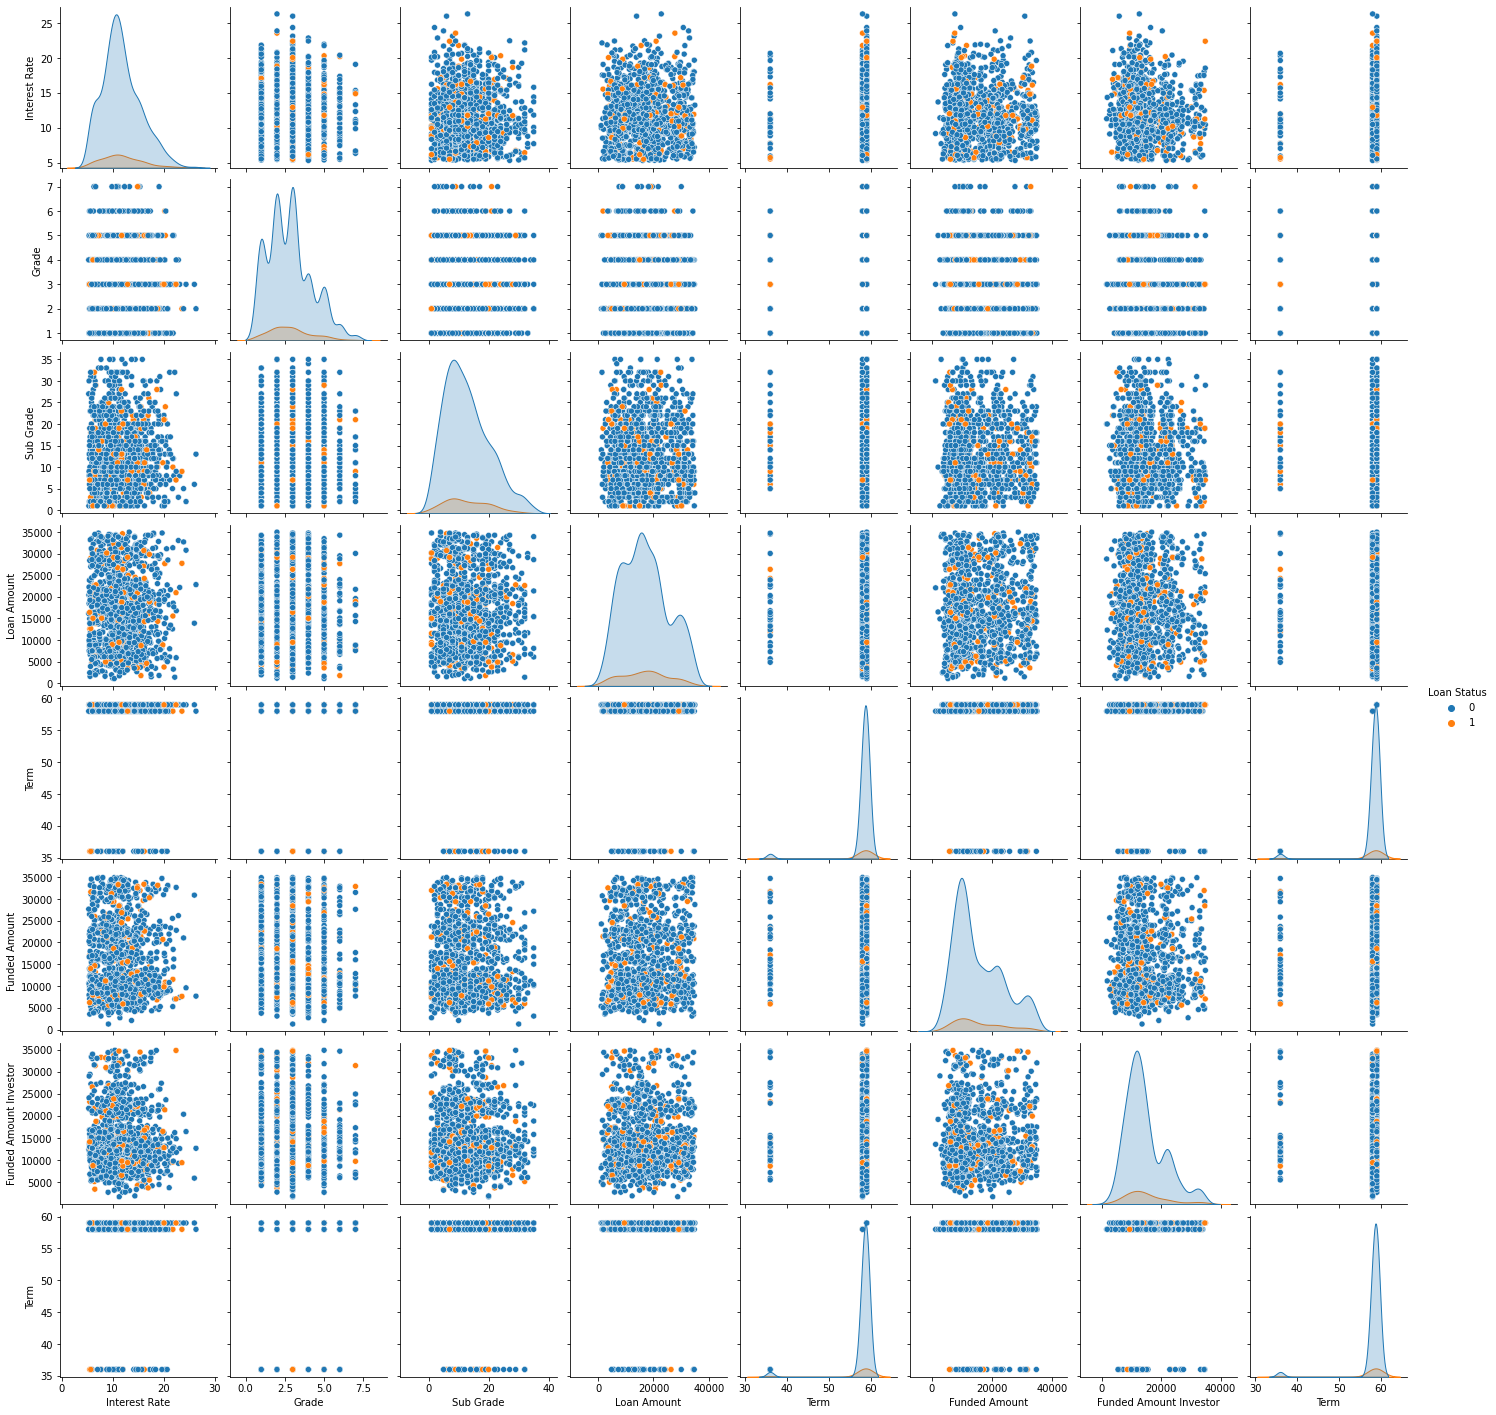

In [ ]:
sns.pairplot(muestra_loan2, vars=['Interest Rate','Grade','Sub Grade','Loan Amount','Term','Funded Amount','Funded Amount Investor','Term'], hue="Loan Status")
plt.show()

## Regresión logisitica (Rehacer)

In [ ]:
loan3=loan2

In [ ]:
# estandarizamos las variables
from sklearn import preprocessing
std_model = preprocessing.StandardScaler()
std_df = std_model.fit_transform(loan3.drop(columns = 'Loan Status'))
std_df

array([[-0.81848272,  2.02006352, -0.33785362, ...,  0.92513643,
        -0.33922335, -0.74670565],
       [-1.58224347, -0.4699584 , -0.35809828, ..., -1.08092165,
        -0.33922335,  1.3392158 ],
       [ 1.36560293, -0.7924982 ,  1.02890521, ...,  0.92513643,
        -0.33922335, -0.74670565],
       ...,
       [-0.11375778,  2.10410299, -0.33783964, ...,  0.92513643,
        -0.33922335, -0.74670565],
       [-0.03368898, -1.32446189,  0.99212863, ..., -1.08092165,
         2.94791032, -0.74670565],
       [-0.17876887,  1.7304034 , -0.06106599, ...,  0.92513643,
        -0.33922335, -0.74670565]])

In [ ]:
# Seapramos el dataset en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(std_df, loan3['Loan Status'], test_size = 0.33, random_state = 37)

In [ ]:
## Creamos nuestro datos de test y train
from sklearn.model_selection import train_test_split

X = loan3.drop("Loan Status", axis=1)
y = loan3["Loan Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(max_iter = 2500)
log_reg_model.fit(X_train, y_train)

# predecimos sobre train y test
y_train_predict = log_reg_model.predict(X_train)
y_test_predict = log_reg_model.predict(X_test)

# calculamos el accuracy para cada uno de los modelos
train_accuracy = sum(y_train_predict == y_train) / len(y_train)
test_accuracy = sum(y_test_predict == y_test) / len(y_test)
print('El accuracy en train para regresión logística es: ', round(train_accuracy, 4) * 100, '%')
print('El accuracy en test para regresión logística es: ', round(test_accuracy, 4) * 100, '%')

El accuracy en train para regresión logística es:  90.73 %
El accuracy en test para regresión logística es:  90.78 %


confusion matrix:  [[20210     0]
 [ 2053     0]]


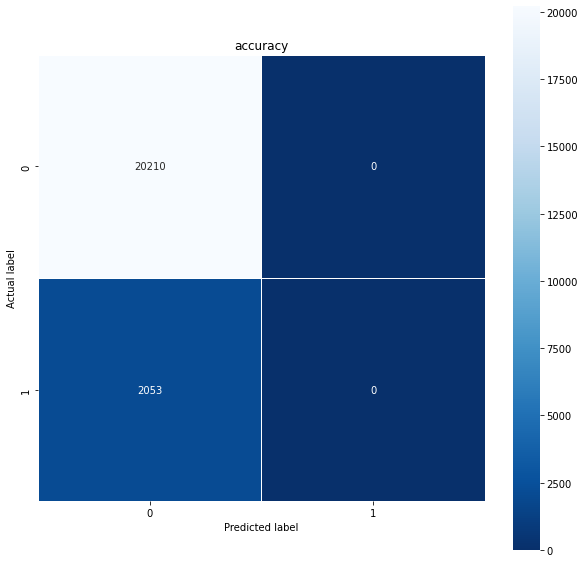

In [ ]:
from sklearn import metrics
# confusion matrix 
cm = metrics.confusion_matrix(y_test, y_test_predict).astype(int)
print('confusion matrix: ', cm)

# graficamos el accuracy del modelo - confusion matrix
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('accuracy')
plt.show()

el área bajo la curva ROC en test es:  0.5124


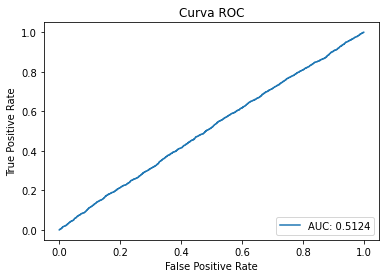

In [ ]:
from sklearn import metrics
# ROC curve
auc = metrics.roc_auc_score(y_test, log_reg_model.decision_function(X_test))
print('el área bajo la curva ROC en test es: ', round(auc, 4))

#define metrics
y_pred_proba = log_reg_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr, label = "AUC: " + str(round(auc, 4)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Curva ROC')
plt.legend(loc=4)
plt.show()

In [ ]:
# como predecir clase no funciona, buscamos predecir la probabilidad e iterar sobre ellos
y_train_predict_proba = log_reg_model.predict_proba(X_train)[:,1]
# iteramos sobre una lista de valores para buscar el mejor threshold 
# (objetivo: maximizar AUC)    
auc_values = []
threshold_values = []
for i in np.arange(0, 0.5, 0.01):
    # predecimos según el threshold definido
    y_train_predict = [1 if x > i else 0 for x in y_train_predict_proba]
    # calculamos los 
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predict)
    # calculate the g-mean for each threshold
    auc = metrics.auc(fpr, tpr)
    # incorporamos los valores a las listas
    auc_values.append(auc)
    threshold_values.append(i)

# graficamos los valores de auc para threshold para elegir el mejor (mayor auc)
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(threshold_values, auc_values, color = 'blue')
plt.show()


NameError: ignored

In [ ]:
# buscamos el mejor valor de auc y su posición
threshold = threshold_values[auc_values.index(np.max(auc_values))]

# predeimos probabilidad
y_train_predict_proba = log_reg_model.predict_proba(X_train)[:,1]
y_test_predict_proba = log_reg_model.predict_proba(X_test)[:,1]

# predecimos nuevamente utilizando el threshold hallado
# a partir del threshold definido recalculamos la pertenencia a una clase 
y_train_predict = [1 if x > threshold else 0 for x in y_train_predict_proba]
y_test_predict = [1 if x > threshold else 0 for x in y_test_predict_proba]

confusion matrix:  [[ 8771 11439]
 [  845  1208]]


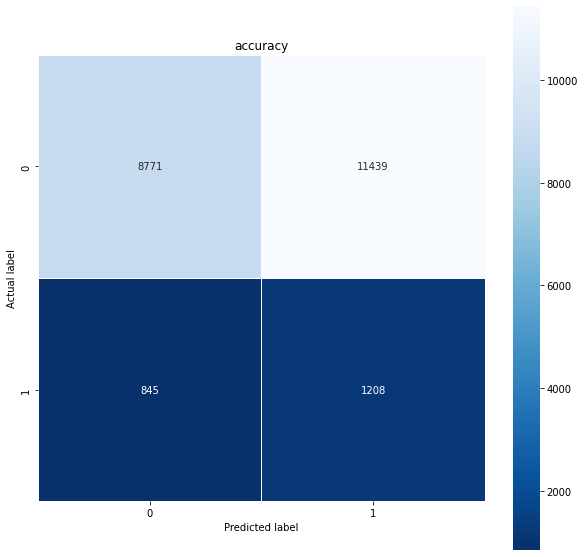

In [ ]:
# confusion matrix 
cm = metrics.confusion_matrix(y_test, y_test_predict).astype(int)
print('confusion matrix: ', cm)

# graficamos el accuracy del modelo - confusion matrix
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('accuracy')
plt.show()

In [ ]:
# calculamos el accuracy para cada uno de los modelos
train_accuracy = sum(y_train_predict == y_train) / len(y_train)
test_accuracy = sum(y_test_predict == y_test) / len(y_test)
print('El accuracy en train para regresión logística es: ', round(train_accuracy, 4) * 100, '%')
print('El accuracy en test para regresión logística es: ', round(test_accuracy, 4) * 100, '%')

El accuracy en train para regresión logística es:  45.79 %
El accuracy en test para regresión logística es:  44.82 %


## Arboles de decisión

In [ ]:
loan4=loan2

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
y = loan4['Loan Status']
X = loan4.drop('Loan Status', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                    test_size=0.3, 
                                                    random_state=42)

# Crear un modelo de árbol de decisión y entrenarlo en el conjunto de entrenamiento
tree = DecisionTreeClassifier(max_depth=21, random_state=33)
tree.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = tree.predict(X_test)

# Evaluar la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))


Precisión del modelo: 87.37%


In [ ]:
# Crea el gráfico del árbol
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Calcular la probabilidad de predicción del modelo en el conjunto de prueba
y_pred_proba = tree.predict_proba(X_test)[:,1]

# Calcular la curva ROC y el AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

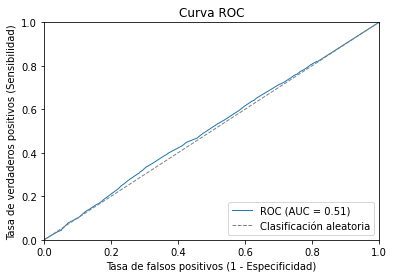

In [ ]:
# Graficar la curva ROC
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', label='Clasificación aleatoria')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Tasa de falsos positivos (1 - Especificidad)')
plt.ylabel('Tasa de verdaderos positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Crear una matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_mat)


Matriz de confusión:
[[18380     6]
 [ 1853     0]]


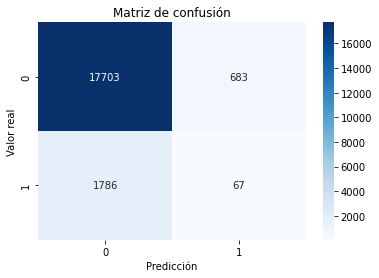

In [ ]:
# Crear un heatmap de la matriz de confusión
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

In [ ]:
# Obtener las probabilidades de predicción para cada clase en el conjunto de prueba
probs = clf.predict_proba(X_test)

# Crear una columna que muestre la probabilidad de cambio de "0" a "1" en los datos de prueba
X_test_A = X_test
X_test_A["Probabilidad_cambio"] = probs[:,1]


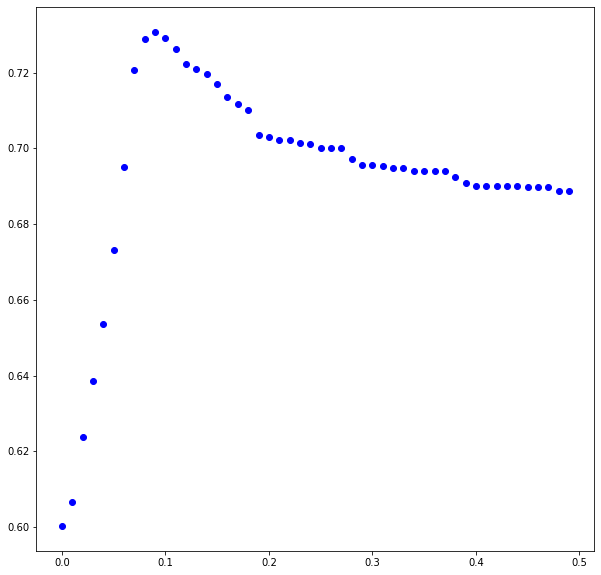

In [ ]:
from sklearn import metrics
# como predecir clase no funciona, buscamos predecir la probabilidad e iterar sobre ellos
y_train_predict_proba = tree.predict_proba(X_train)[:,1]
# iteramos sobre una lista de valores para buscar el mejor threshold 
# (objetivo: maximizar AUC)    
auc_values = []
threshold_values = []
for i in np.arange(0, 0.5, 0.01):
    # predecimos según el threshold definido
    y_train_predict = [1 if x > i else 0 for x in y_train_predict_proba]
    # calculamos los 
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_predict)
    # calculate the g-mean for each threshold
    auc = metrics.auc(fpr, tpr)
    # incorporamos los valores a las listas
    auc_values.append(auc)
    threshold_values.append(i)

# graficamos los valores de auc para threshold para elegir el mejor (mayor auc)
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(threshold_values, auc_values, color = 'blue')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from scipy.stats import randint
# buscamos el mejor valor de auc y su posición
threshold = threshold_values[auc_values.index(np.max(auc_values))]

# predeimos probabilidad
y_train_predict_proba = tree.predict_proba(X_train)[:,1]
y_test_predict_proba = tree.predict_proba(X_test)[:,1]

# predecimos nuevamente utilizando el threshold hallado
# a partir del threshold definido recalculamos la pertenencia a una clase 
y_train_predict = [1 if x > threshold else 0 for x in y_train_predict_proba]
y_test_predict = [1 if x > threshold else 0 for x in y_test_predict_proba]

confusion matrix:  [[14053  4333]
 [ 1382   471]]


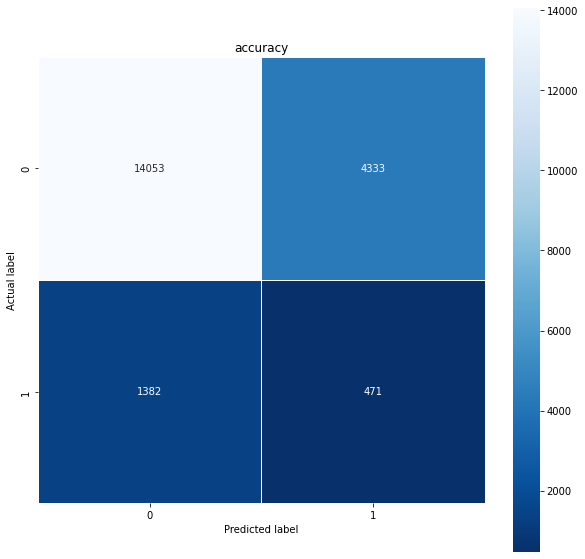

In [ ]:
# confusion matrix 
cm = metrics.confusion_matrix(y_test, y_test_predict).astype(int)
print('confusion matrix: ', cm)

# graficamos el accuracy del modelo - confusion matrix
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('accuracy')
plt.show()

In [ ]:
# Evaluar la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))

Precisión del modelo: 87.37%


In [ ]:
X_test = X_test.drop("Probabilidad_cambio", axis=1)
pred = (clf.predict_proba(X_test)[:,1] >= 0.5).astype(int)

In [ ]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test_A["Probabilidad_cambio"].describe()

## Otros

In [ ]:
loan6 = loan2.rename(columns=lambda x: x.replace(' ', '_'))

In [ ]:
from statsmodels.formula.api import ols

model2 = 'Loan_Status ~ Interest_Rate + Loan_Amount +  Recoveries + Total_Accounts + Revolving_Utilities'
lm2 = ols(formula="Interest_Rate ~ Term  ", data=loan6).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:          Interest_Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.86
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           0.000982
Time:                        19:37:11   Log-Likelihood:            -1.8432e+05
No. Observations:               67463   AIC:                         3.686e+05
Df Residuals:                   67461   BIC:                         3.687e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.6711      0.251     50.544      0.0